In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading the data
cs_df = pd.read_csv('../data/processed_data/cleaned_data.csv')
cs_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# checking the data
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396337 entries, 0 to 396336
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396337 non-null  int64  
 1   StockCode    396337 non-null  object 
 2   Description  396337 non-null  object 
 3   Quantity     396337 non-null  int64  
 4   InvoiceDate  396337 non-null  object 
 5   UnitPrice    396337 non-null  float64
 6   CustomerID   396337 non-null  float64
 7   Country      396337 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.2+ MB


So we will be creating three new features named:
1. Recency
2. Frequency
3. Monetary

In [4]:
cs_df['SalesLineTotal'] = cs_df['Quantity']*cs_df['UnitPrice']
cs_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
396332,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
396333,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
396334,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
396335,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [5]:
aggregated_df = cs_df.groupby(by='CustomerID',as_index=False) \
    .agg(
        MonetaryValue = ('SalesLineTotal','sum'),
        Frequency = ('InvoiceNo','nunique'),
        LastInvoice = ('InvoiceDate','max') 
    )

aggregated_df.head(10)

,CustomerID,MonetaryValue,Frequency,LastInvoice
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00
5,12352.0,1385.74,7,2011-11-03 14:37:00
6,12353.0,89.00,1,2011-05-19 17:47:00
7,12354.0,1079.40,1,2011-04-21 13:11:00
8,12355.0,459.40,1,2011-05-09 13:49:00
9,12356.0,2487.43,3,2011-11-17 08:40:00


In [6]:
aggregated_df.dtypes

CustomerID       float64
MonetaryValue    float64
Frequency          int64
LastInvoice       object
dtype: object

In [7]:
aggregated_df['LastInvoice'] = pd.to_datetime(aggregated_df['LastInvoice'])
aggregated_df.dtypes

CustomerID              float64
MonetaryValue           float64
Frequency                 int64
LastInvoice      datetime64[ns]
dtype: object

In [8]:
max_invoice_date = aggregated_df['LastInvoice'].max()
max_invoice_date

Timestamp('2011-12-09 12:50:00')

In [9]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoice']).dt.days

aggregated_df.head(5)

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309


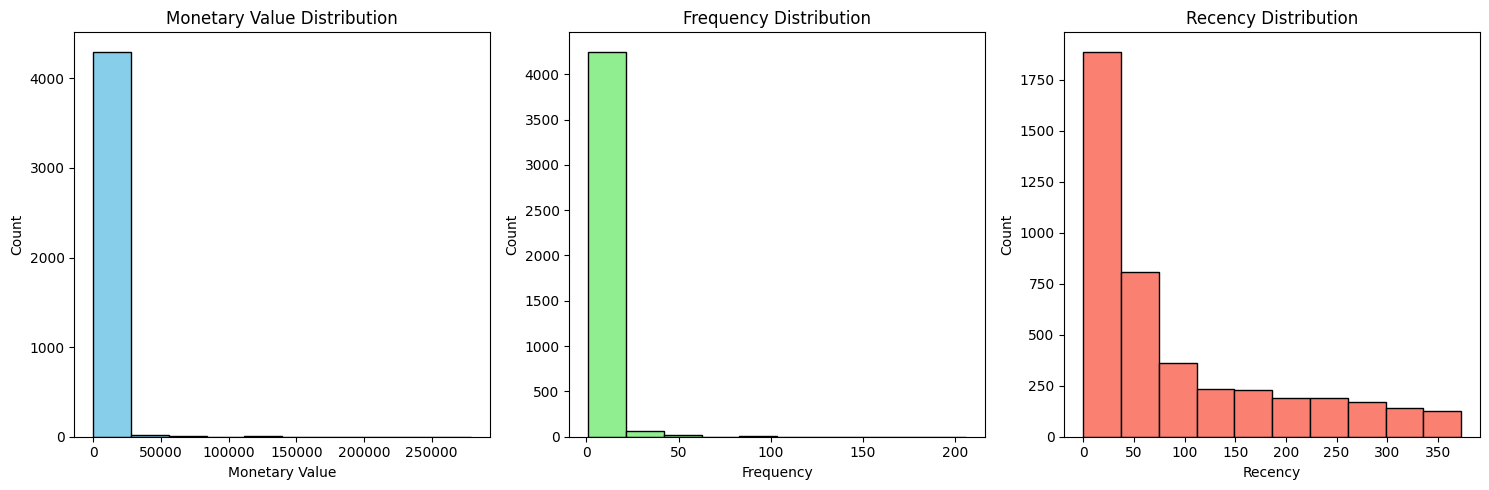

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'],bins = 10,color = 'skyblue',edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins = 10,color = 'lightgreen',edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins = 10,color = 'salmon',edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

So really skewed distribution for the first two plots. So let us look at the boxplots for outlier.

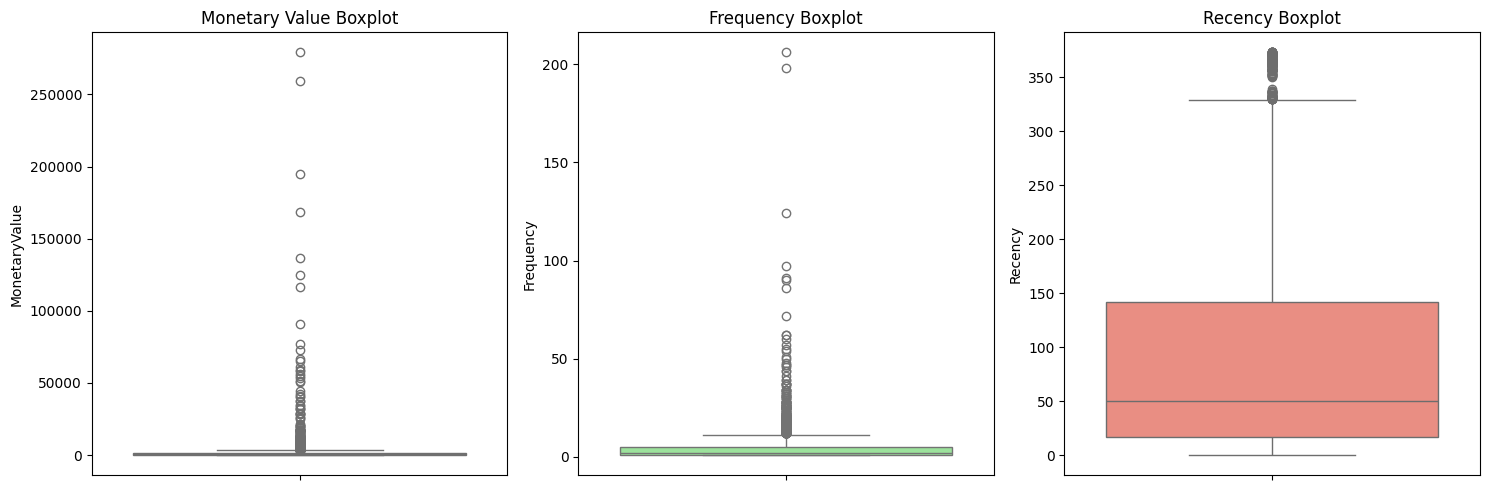

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonetaryValue'],color = 'skyblue')
plt.title('Monetary Value Boxplot')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'],color = 'lightgreen')
plt.title('Frequency Boxplot')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'],color = 'salmon')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

That's very interesting,so we will seperate out the outlier data for further analysis but won't include that in the clustering.

In [39]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

# seperating outlier
monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + M_IQR*1.5)) | 
                                    (aggregated_df['MonetaryValue'] < (M_Q1 - M_IQR*1.5))].copy()
monetary_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency
count,425.000000,425.000000,425.000000,425,425.000000
mean,15033.644706,12568.004141,16.647059,2011-11-14 08:29:09.741176576,24.724706
min,12346.000000,3622.680000,1.000000,2010-12-02 15:27:00,0.000000
25%,13324.000000,4359.320000,8.000000,2011-11-15 14:22:00,3.000000
50%,15005.000000,5891.610000,12.000000,2011-11-29 12:09:00,10.000000
75%,16655.000000,9430.520000,19.000000,2011-12-06 12:09:00,23.000000
max,18251.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1797.854931,26097.899415,19.066978,NaN,47.076383


In [40]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

# seperating outlier
frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + F_IQR*1.5)) | 
                                    (aggregated_df['Frequency'] < (F_Q1 - F_IQR*1.5))].copy()
frequency_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency
count,278.000000,278.000000,278.000000,278,278.000000
mean,15355.669065,14488.006691,23.089928,2011-11-25 21:49:19.640287744,13.165468
min,12395.000000,1296.440000,12.000000,2010-12-02 15:27:00,0.000000
25%,13880.250000,4197.772500,13.000000,2011-11-23 20:17:15,2.000000
50%,15290.500000,6283.525000,17.000000,2011-12-03 13:42:00,5.500000
75%,16781.250000,11040.835000,25.000000,2011-12-07 12:15:30,15.000000
max,18283.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1745.001840,30142.778160,21.166586,NaN,30.366616


In [41]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) &
                               (~aggregated_df.index.isin(frequency_outliers_df.index))].copy()
non_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency
count,3863.000000,3863.000000,3863.000000,3863,3863.000000
mean,15323.852705,853.814416,2.755113,2011-08-31 01:42:04.721718784,99.943826
min,12348.000000,3.750000,1.000000,2010-12-01 09:53:00,0.000000
25%,13850.500000,278.500000,1.000000,2011-07-01 15:21:00,21.000000
50%,15333.000000,570.460000,2.000000,2011-10-11 14:24:00,58.000000
75%,16798.000000,1187.005000,4.000000,2011-11-17 13:39:00,160.000000
max,18287.000000,3619.170000,11.000000,2011-12-09 12:50:00,373.000000
std,1709.731704,794.608100,2.168124,NaN,101.866688


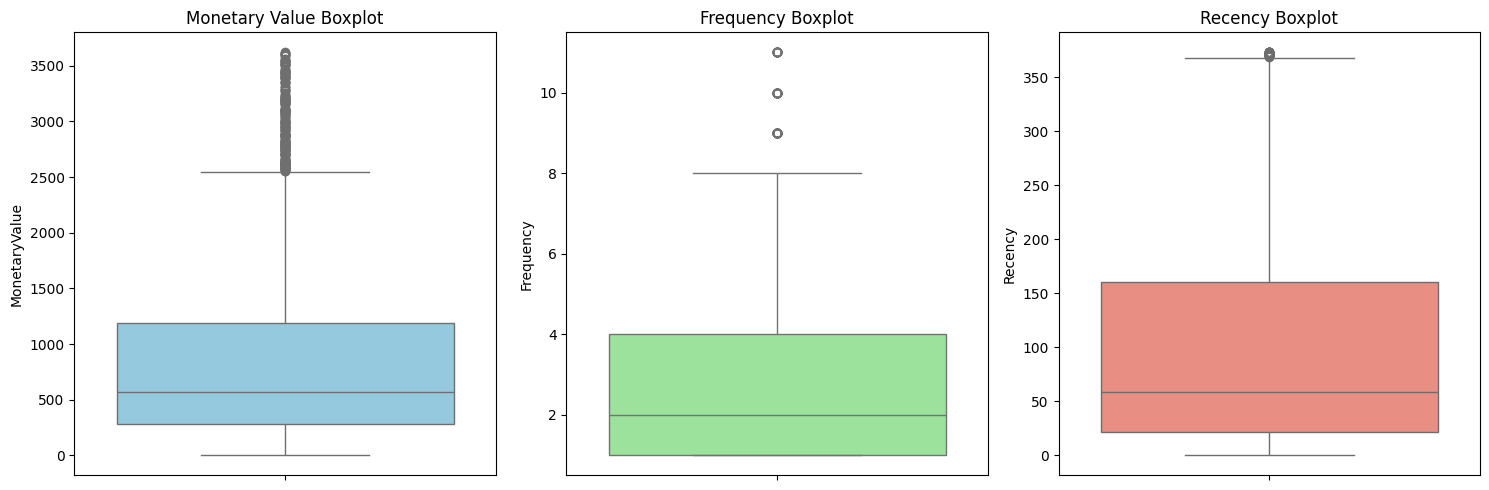

In [42]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df['MonetaryValue'],color = 'skyblue')
plt.title('Monetary Value Boxplot')

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['Frequency'],color = 'lightgreen')
plt.title('Frequency Boxplot')

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'],color = 'salmon')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

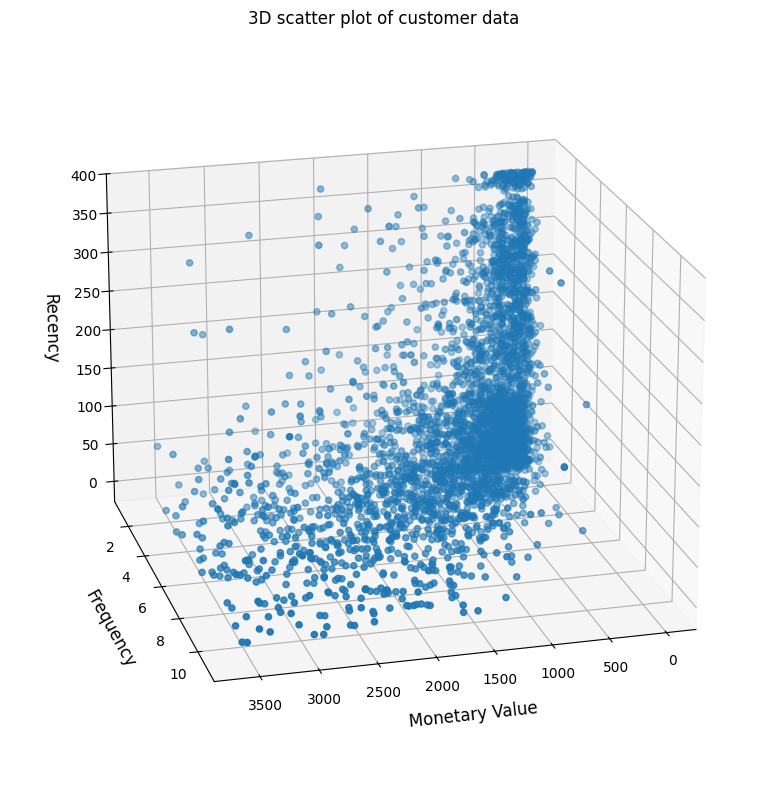

In [43]:
# 3-D plot
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency']
                     )

ax.set_xlabel('Monetary Value', fontsize=12, labelpad=10)
ax.set_ylabel('Frequency', fontsize=12, labelpad=10)
ax.set_zlabel('Recency', fontsize=12, labelpad=10)

ax.set_title('3D scatter plot of customer data')

ax.view_init(elev=20, azim=75)
plt.tight_layout()
plt.show()

You can already see the different scales of the axis,and the K-means clustering algorithm is really sensitive wrt scales. So we will need to do some scaling,we will use standard scaling.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue','Frequency','Recency']])
scaled_data 

array([[ 0.73432565,  0.57425162, -0.25471707],
       [ 0.75988873, -0.8096124 , -0.80452635],
       [-0.70410412, -0.8096124 ,  2.05251827],
       ...,
       [-0.97292551, -0.8096124 ,  0.78599334],
       [-0.85054746, -0.34832439, -0.9125246 ],
       [ 1.23783397,  0.11296362, -0.5688938 ]])

In [46]:
scaled_data_df = pd.DataFrame(scaled_data,index = non_outliers_df.index,columns = ('MonetaryValue','Frequency','Recency'))
scaled_data_df 

,MonetaryValue,Frequency,Recency
2,0.734326,0.574252,-0.254717
3,0.759889,-0.809612,-0.804526
4,-0.704104,-0.809612,2.052518
5,0.669505,1.958116,-0.637620
6,-0.962630,-0.809612,1.011808
...,...,...,...
4328,-0.855771,-0.809612,-0.264535
4329,-0.847338,-0.809612,1.738342
4330,-0.972926,-0.809612,0.785993
4331,-0.850547,-0.348324,-0.912525


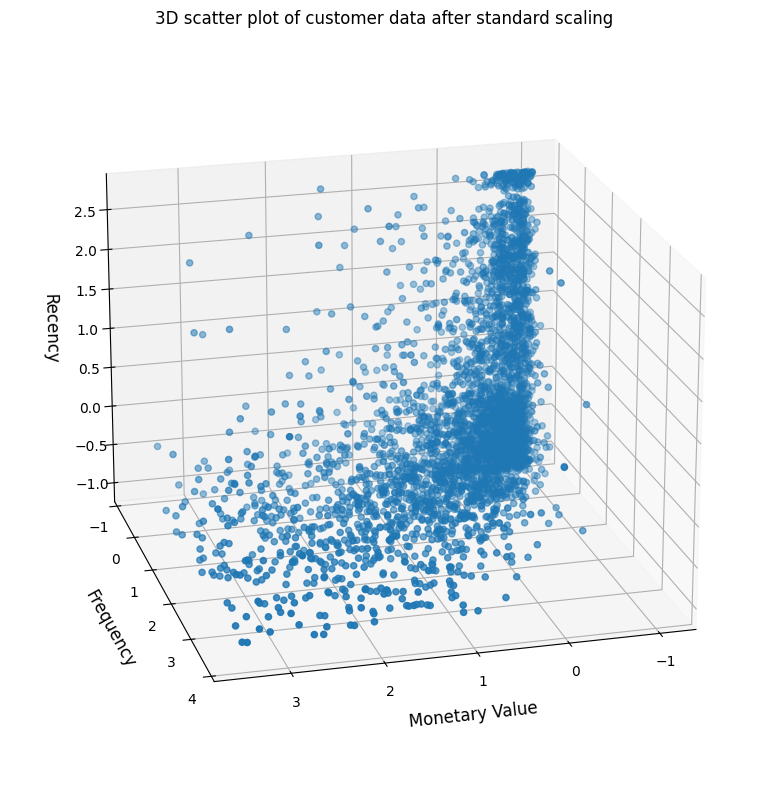

In [63]:
# 3-D plot
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency']
                     )

ax.set_xlabel('Monetary Value', fontsize=12, labelpad=10)
ax.set_ylabel('Frequency', fontsize=12, labelpad=10)
ax.set_zlabel('Recency', fontsize=12, labelpad=10)

ax.set_title('3D scatter plot of customer data after standard scaling')

ax.view_init(elev=20, azim=75)
plt.tight_layout()
plt.show()

# K-Means Clutering

- The number of clusters are determined by the number of centroids.
- To determine the appropriate number of centroids,we want to find the points where these centres are stable.
- We want the avg vector distance between the centroid and the data points to be minimised,this distance is commonly known as **inertia**

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


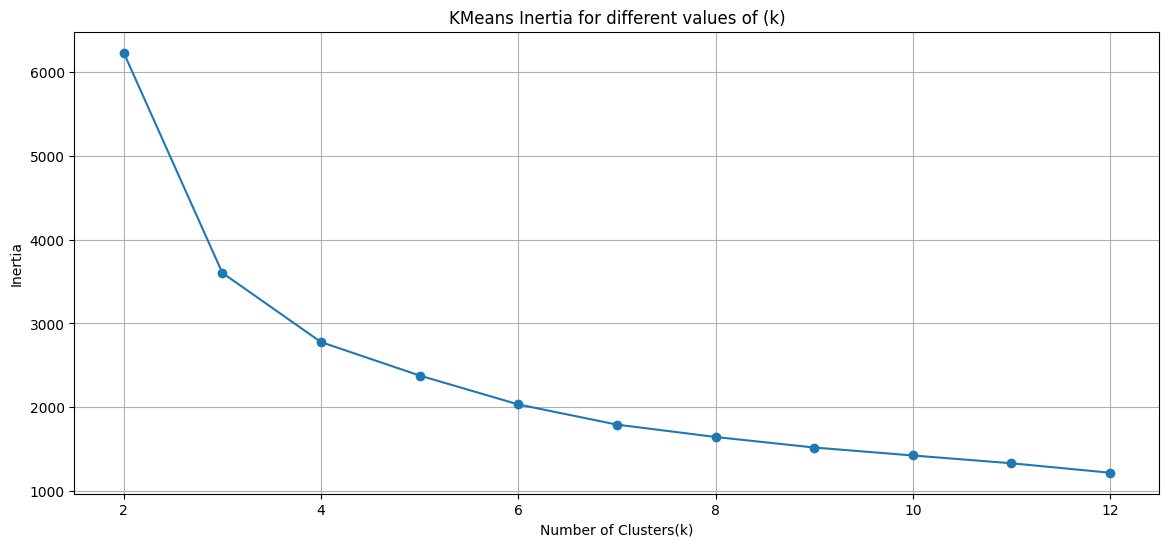

In [49]:
max_k = 12 # max number of clusters we are trying
inertia = []
k_values = range(2,max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,max_iter=1000)

    kmeans.fit_predict(scaled_data_df)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.plot(k_values,inertia,marker='o')
plt.title('KMeans Inertia for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Looking at the graph(elbow method), it looks like we can use k between 3 and 5. But we will check one more metric, **Silhouette Score.** 

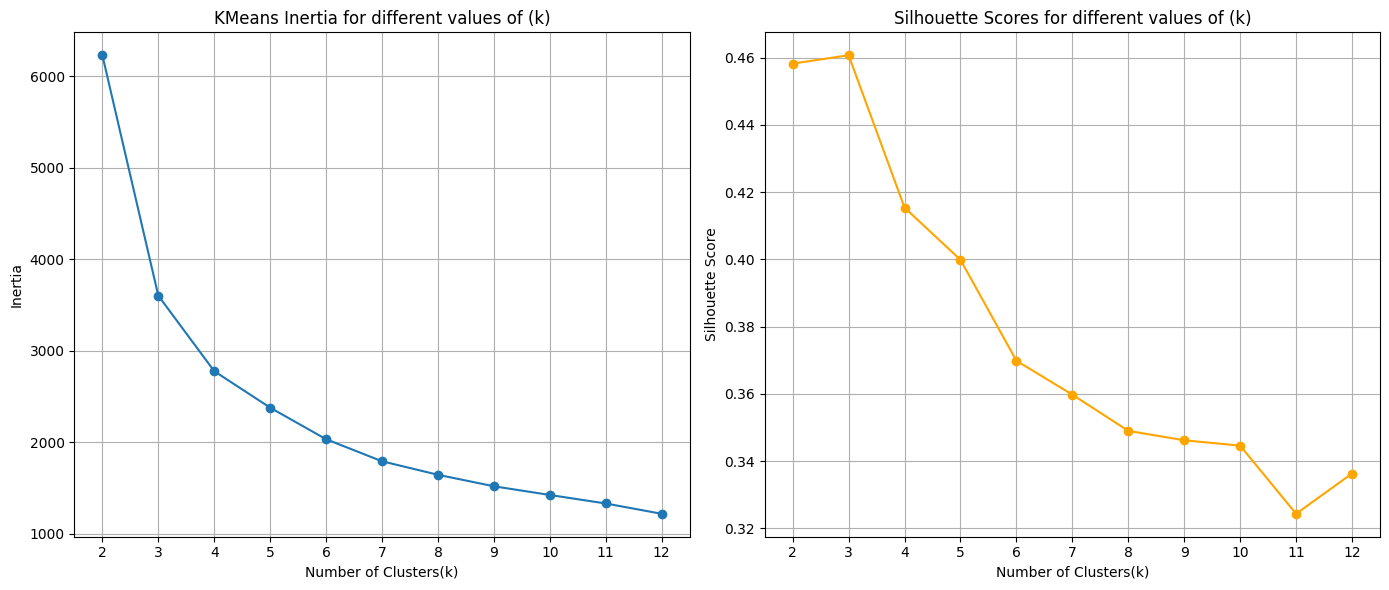

In [50]:
max_k = 12 # max number of clusters we are trying
inertia = []
silhouette_scores = []
k_values = range(2,max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)
    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.title('KMeans Inertia for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values,silhouette_scores,marker='o',color = 'orange')
plt.title('Silhouette Scores for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

We will use k=4 over k=3,and generally using less clusters is good because then it minimises the number of clusetrs you need to seperately analyse. It's a tradeoff.

In [51]:
kmeans = KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([3, 0, 1, ..., 1, 0, 3])

In [52]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4328,18278.0,173.90,1,2011-09-27 11:58:00,73,0
4329,18280.0,180.60,1,2011-03-07 09:52:00,277,1
4330,18281.0,80.82,1,2011-06-12 10:53:00,180,1
4331,18282.0,178.05,2,2011-12-02 11:43:00,7,0


In [53]:
# Check for NaN or unexpected values
print("Unique cluster values:", non_outliers_df['Cluster'].unique())
print("Any NaN values:", non_outliers_df['Cluster'].isna().sum())

Unique cluster values: [3 0 1 2]
Any NaN values: 0


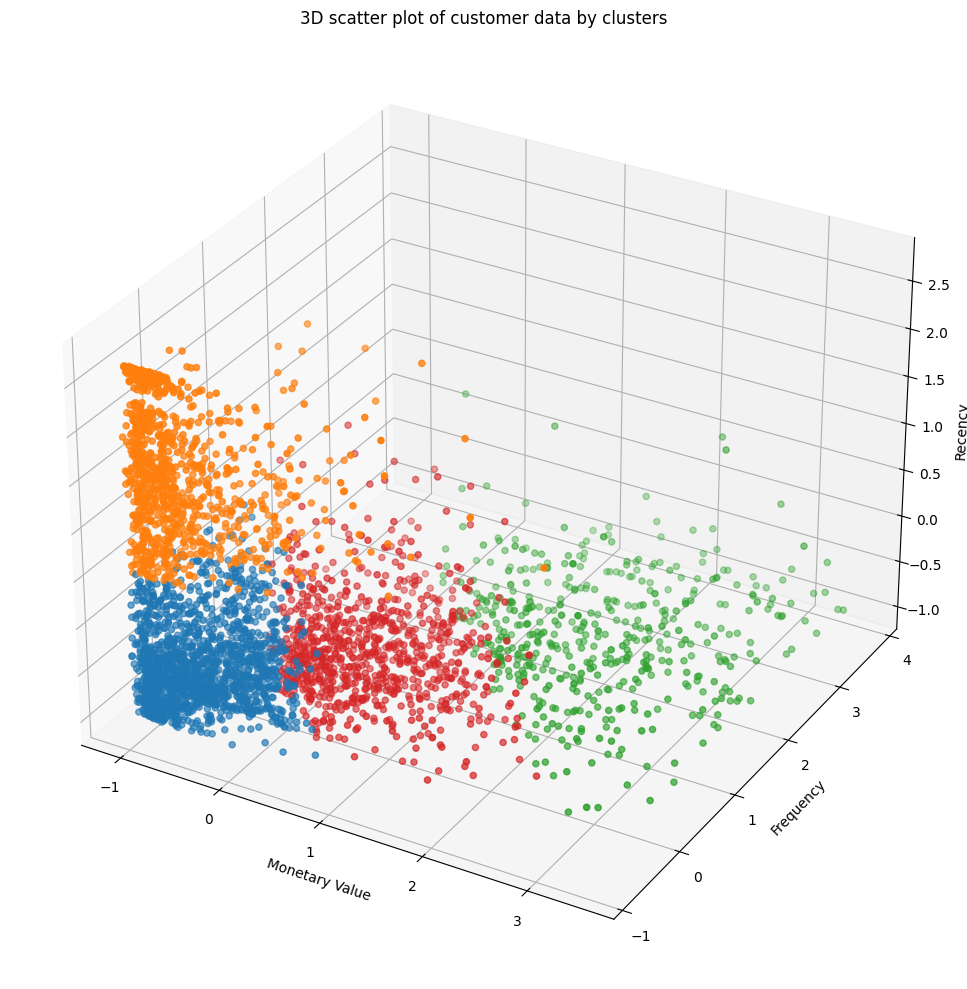

In [64]:
# visualising the different clusters
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency'],
                     c = colors,
                     marker = 'o'
                     )

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of customer data by clusters')

plt.tight_layout()
plt.show()

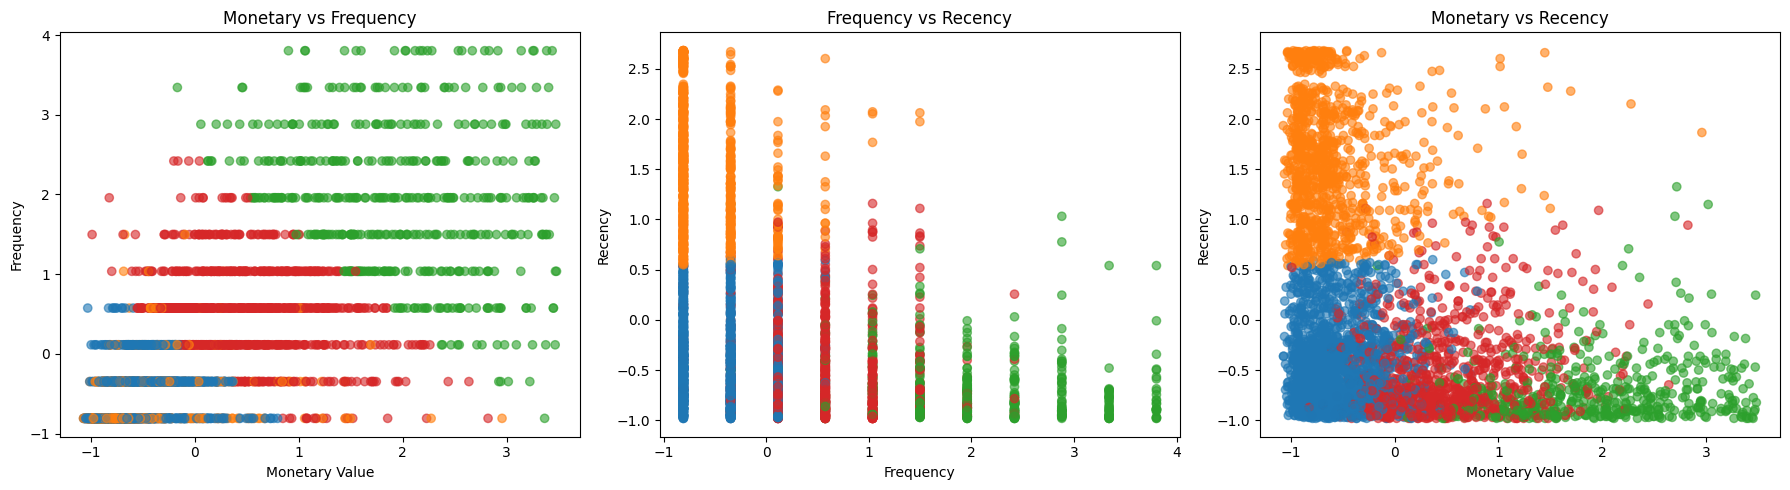

In [65]:
import matplotlib.pyplot as plt

# Cluster color mapping (reuse)
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

# Extract the columns
x = scaled_data_df['MonetaryValue']
y = scaled_data_df['Frequency']
z = scaled_data_df['Recency']

# Set up 2D plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Monetary vs Frequency
axes[0].scatter(x, y, c=colors, alpha=0.6)
axes[0].set_xlabel('Monetary Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Monetary vs Frequency')

# Plot 2: Frequency vs Recency
axes[1].scatter(y, z, c=colors, alpha=0.6)
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Recency')
axes[1].set_title('Frequency vs Recency')

# Plot 3: Monetary vs Recency
axes[2].scatter(x, z, c=colors, alpha=0.6)
axes[2].set_xlabel('Monetary Value')
axes[2].set_ylabel('Recency')
axes[2].set_title('Monetary vs Recency')

plt.tight_layout()
plt.show()


In [ ]:
# visualising the different clusters
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency'],
                     c = colors,
                     marker = 'o'
                     )

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of customer data by clusters')

plt.tight_layout()
plt.show()

# Cluster Analysis

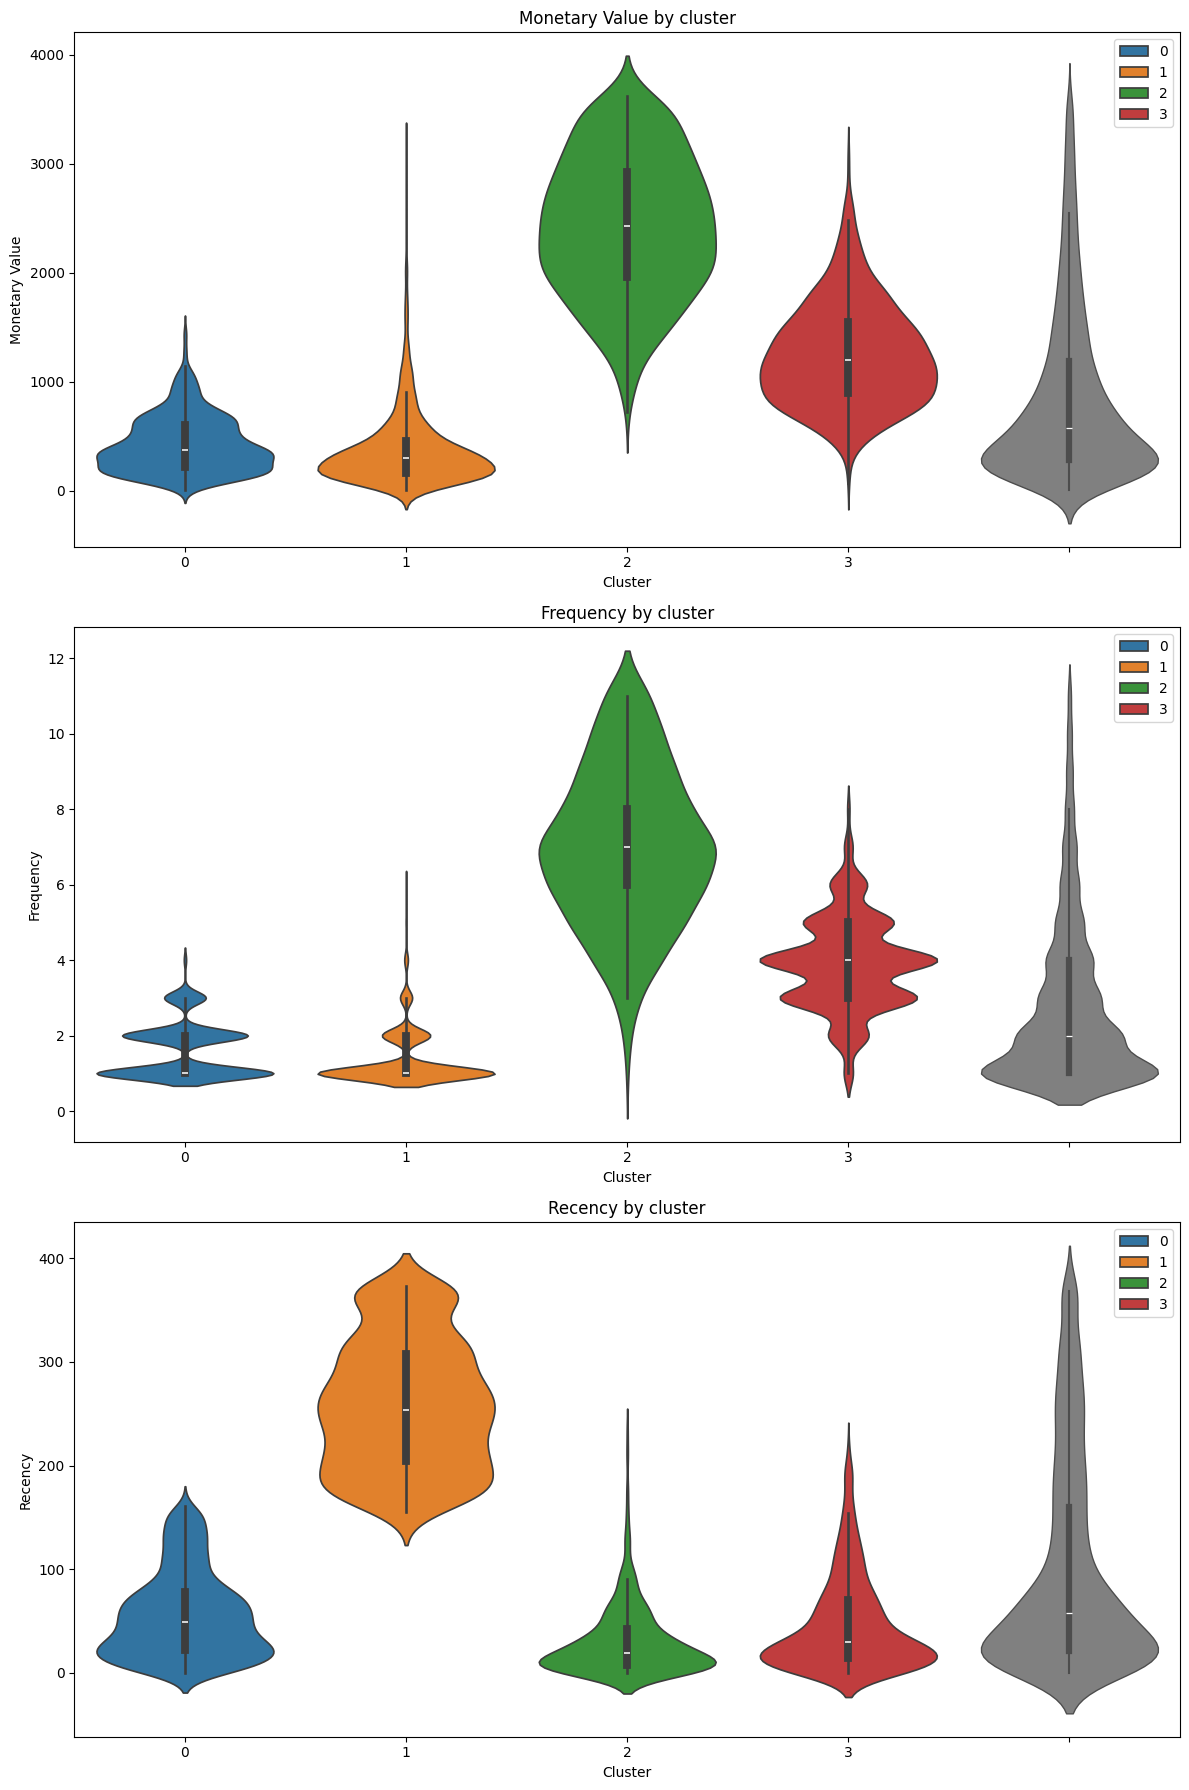

In [66]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['MonetaryValue'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['MonetaryValue'],color = 'gray',linewidth=1.0) # for refernce
plt.title('Monetary Value by cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['Frequency'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Frequency'],color = 'gray',linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['Recency'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Recency'],color = 'gray',linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

- **Cluster 0 (Blue): 'Retain'**
    1. Rationale: This cluster represents high-value customers who purchase regularly, though not always recently. The focus should be retention efforts to maintain their loyalty and spending levels.
    2. Action: Implement loyalty programs,personalised offers,and regular engagement to ensure they remain active.

- **Cluster 1 (Orange): 'Re-enagage'**
    1. Rationale: This cluster represents low-value and infrequent customers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behaviour.
    2. Action: Use targeted marketing campaigns,special discounts,or reminders to encourage them to return and purcahse again.

- **Cluster 2 (Green): 'Nurture'**
    1. Rationale: This cluster represents the least active and lowest value customer but they have made purchases recently. This customer is maybe new or needs nurturing to increase their engagement.
    2. Action: Focus on building relationships,providing excellent customer service,and offering incentives to encourage more frequent purchases.

- **Cluster 3 (Red): 'Reward'**
    1. Rationale: This cluster includes high value,very frequent buyers,many of whom are still actively purchasing. They are your most loyal customers,and rewarding their loyalty is key to maintaining their engagement.
    2. Action: Implement a robust loyalty program,provide exclusive offers and recognise their loyalty to keep them engaged and satsfied.




 **Business Recommendations:**
- **Cluster 1**: Implement a robust loyalty program,provide exclusive offers and recognise their loyalty to keep them engaged and satsfied.
- **Cluster 2**: Focus on building relationships,providing excellent customer service,and offering incentives to encourage more frequent purchases.
- **Cluster 3**: Upsell to higher-value products
- **Cluster 4**: Re-engagement campaigns to prevent churn,they are prime candidates for **win-back campaigns**
- **Cluster 0**: They may be dormant or are one-time buyers. Consider if worth reactivating or let naturally churn.

# Outlier Analysis


In [56]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

Index([  55,   69,   75,  100,  103,  155,  189,  223,  272,  273,
       ...
       4153, 4175, 4197, 4202, 4209, 4248, 4268, 4287, 4289, 4293],
      dtype='int64', length=232)

In [57]:
# Creating three new clusters
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = monetary_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outliers_cluster_df = pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])

outliers_cluster_df

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


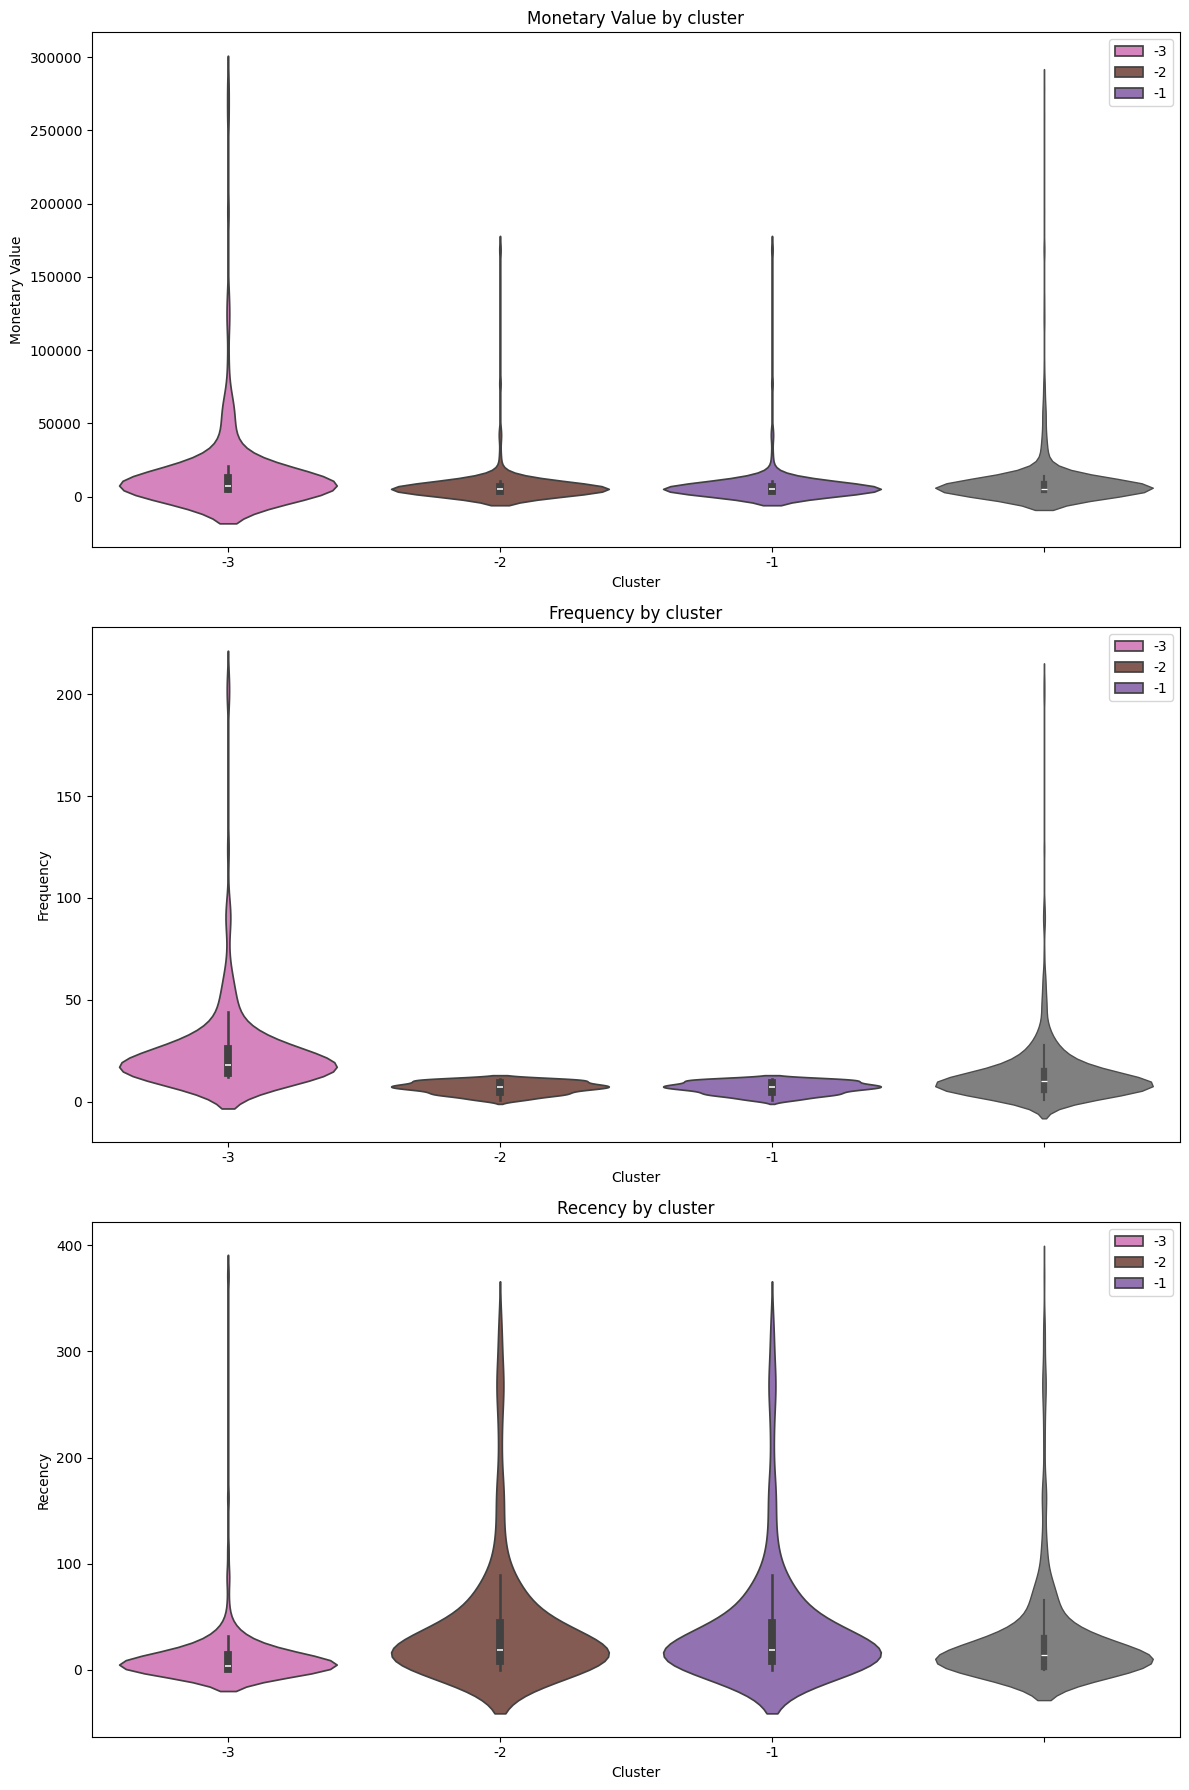

In [58]:
cluster_colors = {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['MonetaryValue'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['MonetaryValue'],color = 'gray',linewidth=1.0) # for refernce
plt.title('Monetary Value by cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['Frequency'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['Frequency'],color = 'gray',linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['Recency'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['Recency'],color = 'gray',linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


- **Cluster -1 (Monetary Outliers) PAMPER:** 
    1. Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
    2. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

- **Cluster -2 (Frequency Outliers) UPSELL:** 
    1. Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. 
    2. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

- **Cluster -3 (Monetary & Frequency Outliers) DELIGHT:**
    1. Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. 
    2. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [59]:
cluster_labels = {
    0: "CHURN",
    1: "REWARD",
    2: "NURTURE",
    3: "UPSELL",
    4: "RE-ENGAGE",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [60]:
full_clustering_df = pd.concat([non_outliers_df, outliers_cluster_df])

full_clustering_df

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


In [61]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster,ClusterLabel
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3,UPSELL
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0,CHURN
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1,REWARD
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2,NURTURE
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1,REWARD
...,...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3,DELIGHT
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3,DELIGHT
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3,DELIGHT
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3,DELIGHT


# Visualisation

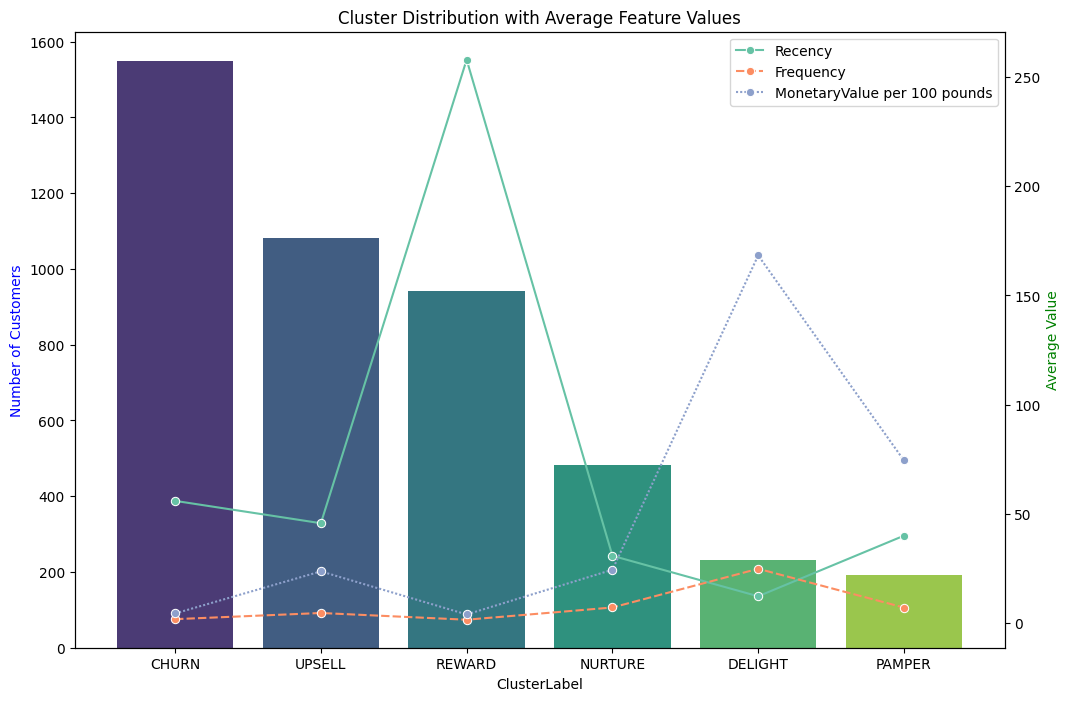

In [62]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()